In [1]:
import pandas as pd
import hvplot.pandas
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
import requests

In [2]:
df_SD=pd.read_csv("./Resources/listings_SD.csv", encoding='utf-8')
df_SD.head()

id                                      listing_url  \
0  4.747585e+07            https://www.airbnb.com/rooms/47475849   
1  8.321610e+17  https://www.airbnb.com/rooms/832160725075323156   
2  2.979673e+07            https://www.airbnb.com/rooms/29796733   
3  5.164055e+07            https://www.airbnb.com/rooms/51640548   
4  7.263140e+17  https://www.airbnb.com/rooms/726314173554301905   

      scrape_id last_scraped           source  \
0  2.023030e+13    3/25/2023  previous scrape   
1  2.023030e+13    3/25/2023      city scrape   
2  2.023030e+13    3/25/2023  previous scrape   
3  2.023030e+13    3/25/2023  previous scrape   
4  2.023030e+13    3/25/2023      city scrape   

                                                name  \
0  WELCOME to "WORLD MAP SUITE" in the heart of P...   
1                         "Pool Villa & Guest House"   
2                                            PB LIFE   
3  Lovely two story apartment Gaslamp / East Village   
4                           Mid-Century Modern House   

                                         description  \
0  Welcome to my home! <br /><br />The “WORLD MAP...   
1  "Luxury Pool Villa With Detached Guest House" ...   
2  Located in the highly sought out Crown Point n...   
3  Enjoy a stylish experience at this centrally-l...   
4  This beautiful Mid-Century Modern home is the ...   

                               neighborhood_overview  \
0                                                NaN   
1  Point Loma is a historic upscale residential c...   
2                                                NaN   
3                                                NaN   
4  North Park is a vibrant and diverse neighborho...   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/0e0be955-e28b...  380705136  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...  133875247  ...   
2  https://a0.muscache.com/pictures/e105cd5d-9093...   18019435  ...   
3  https://a0.muscache.com/pictures/8d58b68f-f762...  114086418  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...  461934073  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         5.0                    5.0                 5.0   
1                         NaN                    NaN                 NaN   
2                         5.0                    5.0                 5.0   
3                         5.0                    5.0                 5.0   
4                         NaN                    NaN                 NaN   

      license instant_bookable calculated_host_listings_count  \
0         NaN                t                              1   
1  STR-06234L                f                              2   
2         NaN                f                              1   
3         NaN                t                              1   
4         NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           2   
2                                           0   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            1   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.04  
1                                           0               NaN  
2                                           0              0.02  
3                                           0              0.05  
4                                           0               NaN  

[5 rows x 75 columns]

In [3]:
df_SD.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
#finding the items in each row 
amenities=df_SD["amenities"].str.replace("[", "",regex=True).str.replace("]","",regex=True).str.replace('"','',regex=True).str.split(", ", expand=True)

amenities=amenities.T
amenities.head()

0                               1                     2      \
0             Baby bath  Cleaning available during stay                Washer   
1                  Iron                            Iron               Hot tub   
2                  Safe                            Safe           Smoke alarm   
3  Lock on bedroom door    Security cameras on property                 Dryer   
4         First aid kit             Table corner guards  Lock on bedroom door   

                          3                      4             5      \
0                   Smoke alarm                 Washer        Washer   
1  Security cameras on property              BBQ grill  Refrigerator   
2                            TV          First aid kit          Iron   
3                          Wifi       Air conditioning         Dryer   
4                 First aid kit  Carbon monoxide alarm         Stove   

                          6                              7      \
0                 Self check-in                   Refrigerator   
1  Security cameras on property                           Iron   
2                        Keypad   Security cameras on property   
3                          None                          Stove   
4                          None  Pack \u2019n play/Travel crib   

                          8                              9      ...  \
0                        Washer                   Refrigerator  ...   
1               Host greets you                           Iron  ...   
2                   Smoke alarm   Security cameras on property  ...   
3  Security cameras on property  Pack \u2019n play/Travel crib  ...   
4                            TV                  Window guards  ...   

                   12861            12862        12863                12864  \
0           Refrigerator           Washer       Washer               Washer   
1                   Iron               TV  Smoke alarm         Refrigerator   
2                  Stove  Host greets you           TV           Hair dryer   
3          Self check-in          Kitchen         Wifi  Free street parking   
4  Carbon monoxide alarm             None      Kitchen                 Iron   

        12865         12866                           12867  \
0      Washer        Washer                    Refrigerator   
1     Hot tub  Refrigerator                            Iron   
2   Breakfast          Iron                            Safe   
3   Hot water         Dryer  Paid washer \u2013 In building   
4  Essentials         Stove             Dedicated workspace   

                        12868                   12869                   12870  
0      Bed sheets and pillows  Bed sheets and pillows             Mini fridge  
1                  Toiletries              Toiletries              Hair dryer  
2                 Smoke alarm                    Iron  Bed sheets and pillows  
3                Coffee maker                    Safe                    HDTV  
4  Heated pool \u2014 outdoor               BBQ grill                    Iron  

[5 rows x 12871 columns]

In [5]:
#finding unique amenities for each unit (this is just a test to make sure we don't have double entries)
amenities_list_unit=[]
for i in range(0, len(df_SD)):
    temp=amenities[i].unique()
    amenities_list_unit.append(temp)


In [6]:
amenities_count=[]
for i in range(0, len(df_SD)):
   t=len(amenities_list_unit[i])
   amenities_count.append(t)

amenities_count=pd.DataFrame(amenities_count).rename(columns={0:"amenities_count"})
df_SD_2=pd.concat([df_SD , amenities_count], axis=1)
df_SD_2.head()

id                                      listing_url  \
0  4.747585e+07            https://www.airbnb.com/rooms/47475849   
1  8.321610e+17  https://www.airbnb.com/rooms/832160725075323156   
2  2.979673e+07            https://www.airbnb.com/rooms/29796733   
3  5.164055e+07            https://www.airbnb.com/rooms/51640548   
4  7.263140e+17  https://www.airbnb.com/rooms/726314173554301905   

      scrape_id last_scraped           source  \
0  2.023030e+13    3/25/2023  previous scrape   
1  2.023030e+13    3/25/2023      city scrape   
2  2.023030e+13    3/25/2023  previous scrape   
3  2.023030e+13    3/25/2023  previous scrape   
4  2.023030e+13    3/25/2023      city scrape   

                                                name  \
0  WELCOME to "WORLD MAP SUITE" in the heart of P...   
1                         "Pool Villa & Guest House"   
2                                            PB LIFE   
3  Lovely two story apartment Gaslamp / East Village   
4                           Mid-Century Modern House   

                                         description  \
0  Welcome to my home! <br /><br />The “WORLD MAP...   
1  "Luxury Pool Villa With Detached Guest House" ...   
2  Located in the highly sought out Crown Point n...   
3  Enjoy a stylish experience at this centrally-l...   
4  This beautiful Mid-Century Modern home is the ...   

                               neighborhood_overview  \
0                                                NaN   
1  Point Loma is a historic upscale residential c...   
2                                                NaN   
3                                                NaN   
4  North Park is a vibrant and diverse neighborho...   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/0e0be955-e28b...  380705136  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...  133875247  ...   
2  https://a0.muscache.com/pictures/e105cd5d-9093...   18019435  ...   
3  https://a0.muscache.com/pictures/8d58b68f-f762...  114086418  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...  461934073  ...   

  review_scores_location review_scores_value     license instant_bookable  \
0                    5.0                 5.0         NaN                t   
1                    NaN                 NaN  STR-06234L                f   
2                    5.0                 5.0         NaN                f   
3                    5.0                 5.0         NaN                t   
4                    NaN                 NaN         NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           0   
1                              2                                           2   
2                              1                                           0   
3                              1                                           1   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            1   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
0                                           0              0.04   
1                                           0               NaN   
2                                           0              0.02   
3                                           0              0.05   
4                                           0               NaN   

  amenities_count  
0              33  
1              81  
2              17  
3              10  
4              34  

[5 rows x 76 columns]

In [7]:
#putting all the amenities in all units in one list (there are for sure duplicates)
amenities_list_all=[]
for i in range(0, len(amenities_list_unit)):
    amenities_list_all=list(amenities_list_unit[i])+amenities_list_all


In [8]:
#all uniques amenities in SD
unique_amenities=pd.DataFrame(pd.DataFrame(amenities_list_all)[0].unique())
unique_amenities.head()

0
0             Mini fridge
1              Hair dryer
2  Bed sheets and pillows
3                    HDTV
4                    Iron

In [9]:
#finding the top amenities
amenities=pd.DataFrame(amenities_list_all).rename(columns={0:"amenities"})
amenities_stat=amenities.groupby("amenities")['amenities'].count().sort_values(ascending=False)
pd.DataFrame(amenities_stat).head(10)

amenities
amenities                       
Smoke alarm                12442
Carbon monoxide alarm      11667
Kitchen                    11593
Essentials                 11555
Wifi                       11505
Hangers                    10814
Hair dryer                 10604
Dishes and silverware      10521
Hot water                  10481
Iron                       10246

# Finding the range of amenities and bin them into basic, moderate and luxury

In [10]:
# sort the count of amenities and plot the result
amenities_count_sorted=pd.DataFrame(df_SD_2["amenities_count"].sort_values())
summary_amenities_count=pd.DataFrame(amenities_count_sorted.groupby("amenities_count")["amenities_count"].count())
summary_amenities_count=summary_amenities_count.rename(columns={"amenities_count":"count"})
summary_amenities_count.hvplot.scatter(x="amenities_count", y="count")

:Scatter   [amenities_count]   (count)

### Here are our assumption to categories the amenities:
Basic amenities as those with less than 20 count of amenities
Moderate amenities as those with count of amenities between 20 and 60, and 
Luxury amenities as those with more than 60 amenities

In [11]:
# categorizing the amenities
df_SD_2["amenities_cat"]="moderate"
df_SD_2.loc[df_SD_2["amenities_count"]<20,"amenities_cat" ]="basic"
df_SD_2.loc[df_SD_2["amenities_count"]>60,"amenities_cat" ]="luxury"
df_SD_2

id                                      listing_url  \
0      4.747585e+07            https://www.airbnb.com/rooms/47475849   
1      8.321610e+17  https://www.airbnb.com/rooms/832160725075323156   
2      2.979673e+07            https://www.airbnb.com/rooms/29796733   
3      5.164055e+07            https://www.airbnb.com/rooms/51640548   
4      7.263140e+17  https://www.airbnb.com/rooms/726314173554301905   
...             ...                                              ...   
12866  3.774158e+07            https://www.airbnb.com/rooms/37741577   
12867  6.340950e+17  https://www.airbnb.com/rooms/634095272329380456   
12868  4.307796e+07            https://www.airbnb.com/rooms/43077965   
12869  4.287564e+07            https://www.airbnb.com/rooms/42875640   
12870  4.349917e+07            https://www.airbnb.com/rooms/43499167   

          scrape_id last_scraped           source  \
0      2.023030e+13    3/25/2023  previous scrape   
1      2.023030e+13    3/25/2023      city scrape   
2      2.023030e+13    3/25/2023  previous scrape   
3      2.023030e+13    3/25/2023  previous scrape   
4      2.023030e+13    3/25/2023      city scrape   
...             ...          ...              ...   
12866  2.023030e+13    3/25/2023  previous scrape   
12867  2.023030e+13    3/25/2023  previous scrape   
12868  2.023030e+13    3/25/2023  previous scrape   
12869  2.023030e+13    3/25/2023  previous scrape   
12870  2.023030e+13    3/25/2023  previous scrape   

                                                    name  \
0      WELCOME to "WORLD MAP SUITE" in the heart of P...   
1                             "Pool Villa & Guest House"   
2                                                PB LIFE   
3      Lovely two story apartment Gaslamp / East Village   
4                               Mid-Century Modern House   
...                                                  ...   
12866          The Best In Mission Valley 2 Bedrooms MB4   
12867                                   Studio San Diego   
12868                              PB Surf Beachside Inn   
12869                                 Pacific Shores Inn   
12870                                      La Jolla Cove   

                                             description  \
0      Welcome to my home! <br /><br />The “WORLD MAP...   
1      "Luxury Pool Villa With Detached Guest House" ...   
2      Located in the highly sought out Crown Point n...   
3      Enjoy a stylish experience at this centrally-l...   
4      This beautiful Mid-Century Modern home is the ...   
...                                                  ...   
12866  Each unit has been carefully planned, offering...   
12867  Enjoy a stylish experience at this centrally-l...   
12868                                                NaN   
12869                                                NaN   
12870                                                NaN   

                                   neighborhood_overview  \
0                                                    NaN   
1      Point Loma is a historic upscale residential c...   
2                                                    NaN   
3                                                    NaN   
4      North Park is a vibrant and diverse neighborho...   
...                                                  ...   
12866                                                NaN   
12867                                                NaN   
12868                                                NaN   
12869                                                NaN   
12870                                                NaN   

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/0e0be955-e28b...  380705136  ...   
1      https://a0.muscache.com/pictures/miso/Hosting-...  133875247  ...   
2      https://a0.muscache.com/pictures/e105cd5d-9093...   18019435  ...   
3      https://a0.muscache.com/pictures/8d58b68f

In [ ]:
#converting lat and long to zipcode using an api request

def get_zipcode(lat_field, lon_field):
    url = f'https://nominatim.openstreetmap.org/reverse?lat={lat_field}&lon={lon_field}&format=json&accept-language=en'
    try:
        result = requests.get(url=url)
        result_json = result.json()
        return result_json['address']['postcode']
    except:
        return None
    
df_zip = df_SD_2[["latitude", "longitude"]].reset_index(drop=True).round(3)

zipcode=pd.DataFrame()
for i in range(0, len(df_SD_2)):
    temp=pd.DataFrame([{"zipcode":get_zipcode(df_zip["latitude"][i],df_zip["longitude"][i])}])
    zipcode=pd.concat([zipcode,temp])

zipcode

In [ ]:
# adding the zipcode column to the dataframe
df_SD_2=pd.concat([df_SD_2,zipcodes], axis=1)

In [12]:
#finding the unique bathrooms type
df_SD_2["bathrooms_text"].unique()

array(['1 private bath', '4 baths', '1.5 baths', '2 baths', '1 bath',
       '0 shared baths', '23 baths', '5 baths', '2 shared baths',
       '8.5 baths', '1 shared bath', '3 baths', '2.5 baths', '11 baths',
       '7 baths', '5.5 baths', '14 baths', '8 baths', '4.5 baths',
       '9.5 baths', '6 baths', '3.5 baths', '9 baths', '7.5 baths',
       '6.5 baths', '33.5 baths', '10 baths', '1.5 shared baths',
       '12.5 baths', '0 baths', '3 shared baths', '2.5 shared baths',
       '4 shared baths', '3.5 shared baths', '6 shared baths', '20 baths',
       nan, '27.5 baths', 'Half-bath', '4.5 shared baths',
       '5.5 shared baths', '6.5 shared baths', '5 shared baths',
       '8 shared baths', 'Shared half-bath'], dtype=object)

In [14]:
# Selecting only the important columns
my_data=df_SD_2[["listing_url",
"last_scraped",
"host_since",
--"host_response_rate",
--"host_acceptance_rate",
"host_is_superhost",
#"host_total_listings_count",
#"host_has_profile_pic",
#"host_identity_verified",
"neighbourhood_cleansed",
"room_type",
"accommodates",
"bathrooms_text",
"bedrooms",
--"beds",
"amenities_cat",
"minimum_nights",
--"maximum_nights",
--"number_of_reviews",
--"review_scores_rating",
--"review_scores_accuracy",
--"review_scores_cleanliness",
--"review_scores_checkin",
--"review_scores_communication",
--"review_scores_location",
--"review_scores_value",
"instant_bookable",
# "availability_30",
# "availability_60",
# "availability_90",
"availability_365",
"price",
"latitude",
"longitude"        
]]
my_data

listing_url last_scraped  \
0                https://www.airbnb.com/rooms/47475849    3/25/2023   
1      https://www.airbnb.com/rooms/832160725075323156    3/25/2023   
2                https://www.airbnb.com/rooms/29796733    3/25/2023   
3                https://www.airbnb.com/rooms/51640548    3/25/2023   
4      https://www.airbnb.com/rooms/726314173554301905    3/25/2023   
...                                                ...          ...   
12866            https://www.airbnb.com/rooms/37741577    3/25/2023   
12867  https://www.airbnb.com/rooms/634095272329380456    3/25/2023   
12868            https://www.airbnb.com/rooms/43077965    3/25/2023   
12869            https://www.airbnb.com/rooms/42875640    3/25/2023   
12870            https://www.airbnb.com/rooms/43499167    3/25/2023   

       host_since host_response_rate host_acceptance_rate host_is_superhost  \
0      12/18/2020                NaN                  NaN                 f   
1        6/7/2017               100%                  86%                 f   
2       7/12/2014                NaN                  NaN                 f   
3       1/30/2017                NaN                  NaN                 f   
4       5/31/2022               100%                  NaN                 f   
...           ...                ...                  ...               ...   
12866   5/31/2013               100%                  98%                 f   
12867   5/24/2022                NaN                   0%                 f   
12868  11/22/2019                NaN                  NaN               NaN   
12869  11/22/2019                NaN                  NaN               NaN   
12870   5/20/2020                NaN                  NaN               NaN   

      neighbourhood_cleansed        room_type  accommodates  bathrooms_text  \
0                Mission Bay     Private room             2  1 private bath   
1                  Roseville  Entire home/apt            14         4 baths   
2                Mission Bay     Private room             2  1 private bath   
3               East Village  Entire home/apt             4       1.5 baths   
4                North Hills  Entire home/apt             8         2 baths   
...                      ...              ...           ...             ...   
12866         Mission Valley  Entire home/apt             7         2 baths   
12867           East Village  Entire home/apt             2          1 bath   
12868          Pacific Beach       Hotel room             0             NaN   
12869          Pacific Beach       Hotel room             0             NaN   
12870               La Jolla       Hotel room             0             NaN   

       ...  review_scores_cleanliness  review_scores_checkin  \
0      ...                       5.00                   5.00   
1      ...                        NaN                    NaN   
2      ...                       5.00                   5.00   
3      ...                       5.00                   5.00   
4      ...                        NaN                    NaN   
...    ...                        ...                    ...   
12866  ...                       4.92                   4.92   
12867  ...                        NaN                    NaN   
12868  ...                        NaN                    NaN   
12869  ...                        NaN                    NaN   
12870  ...                        NaN                    NaN   

      review_scores_communication  review_scores_location  \
0                            5.00                     5.0   
1                             NaN                     NaN   
2                            5.00                     5.0   
3                            5.00                     5.0   
4                             NaN                     NaN   
...                           ...                     ...   
12866                        4.75                     5.0   
12867                         NaN  

In [15]:
#finding the type of each column
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12871 entries, 0 to 12870
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_url                  12871 non-null  object 
 1   last_scraped                 12871 non-null  object 
 2   host_since                   12868 non-null  object 
 3   host_response_rate           11440 non-null  object 
 4   host_acceptance_rate         11952 non-null  object 
 5   host_is_superhost            12864 non-null  object 
 6   neighbourhood_cleansed       12871 non-null  object 
 7   room_type                    12871 non-null  object 
 8   accommodates                 12871 non-null  int64  
 9   bathrooms_text               12866 non-null  object 
 10  bedrooms                     11774 non-null  float64
 11  beds                         12707 non-null  float64
 12  amenities_cat                12871 non-null  object 
 13  minimum_nights  

In [16]:
# making sure "NaN" is a legitimate numpy NaN and not just a string
df=my_data.replace("NaN", np.nan)
df

listing_url last_scraped  \
0                https://www.airbnb.com/rooms/47475849    3/25/2023   
1      https://www.airbnb.com/rooms/832160725075323156    3/25/2023   
2                https://www.airbnb.com/rooms/29796733    3/25/2023   
3                https://www.airbnb.com/rooms/51640548    3/25/2023   
4      https://www.airbnb.com/rooms/726314173554301905    3/25/2023   
...                                                ...          ...   
12866            https://www.airbnb.com/rooms/37741577    3/25/2023   
12867  https://www.airbnb.com/rooms/634095272329380456    3/25/2023   
12868            https://www.airbnb.com/rooms/43077965    3/25/2023   
12869            https://www.airbnb.com/rooms/42875640    3/25/2023   
12870            https://www.airbnb.com/rooms/43499167    3/25/2023   

       host_since host_response_rate host_acceptance_rate host_is_superhost  \
0      12/18/2020                NaN                  NaN                 f   
1        6/7/2017               100%                  86%                 f   
2       7/12/2014                NaN                  NaN                 f   
3       1/30/2017                NaN                  NaN                 f   
4       5/31/2022               100%                  NaN                 f   
...           ...                ...                  ...               ...   
12866   5/31/2013               100%                  98%                 f   
12867   5/24/2022                NaN                   0%                 f   
12868  11/22/2019                NaN                  NaN               NaN   
12869  11/22/2019                NaN                  NaN               NaN   
12870   5/20/2020                NaN                  NaN               NaN   

      neighbourhood_cleansed        room_type  accommodates  bathrooms_text  \
0                Mission Bay     Private room             2  1 private bath   
1                  Roseville  Entire home/apt            14         4 baths   
2                Mission Bay     Private room             2  1 private bath   
3               East Village  Entire home/apt             4       1.5 baths   
4                North Hills  Entire home/apt             8         2 baths   
...                      ...              ...           ...             ...   
12866         Mission Valley  Entire home/apt             7         2 baths   
12867           East Village  Entire home/apt             2          1 bath   
12868          Pacific Beach       Hotel room             0             NaN   
12869          Pacific Beach       Hotel room             0             NaN   
12870               La Jolla       Hotel room             0             NaN   

       ...  review_scores_cleanliness  review_scores_checkin  \
0      ...                       5.00                   5.00   
1      ...                        NaN                    NaN   
2      ...                       5.00                   5.00   
3      ...                       5.00                   5.00   
4      ...                        NaN                    NaN   
...    ...                        ...                    ...   
12866  ...                       4.92                   4.92   
12867  ...                        NaN                    NaN   
12868  ...                        NaN                    NaN   
12869  ...                        NaN                    NaN   
12870  ...                        NaN                    NaN   

      review_scores_communication  review_scores_location  \
0                            5.00                     5.0   
1                             NaN                     NaN   
2                            5.00                     5.0   
3                            5.00                     5.0   
4                             NaN                     NaN   
...                           ...                     ...   
12866                        4.75                     5.0   
12867                         NaN  

In [17]:
# converting the "host_response_rate", "host_acceptance_rate" columns from object to float
df[["host_response_rate", "host_acceptance_rate"]]=df[["host_response_rate", "host_acceptance_rate"]].replace("%","", regex=True).astype(float)

In [18]:
#converting the first_review column from object to date
df["host_since"]=pd.to_datetime(df["host_since"])
df["last_scraped"]=pd.to_datetime(df["last_scraped"])
df["years_in_business"]=(((df["last_scraped"]-df["host_since"])) / np.timedelta64(1, 'Y')).round(0).astype(float)
df["years_in_business"]

0         2.0
1         6.0
2         9.0
3         6.0
4         1.0
         ... 
12866    10.0
12867     1.0
12868     3.0
12869     3.0
12870     3.0
Name: years_in_business, Length: 12871, dtype: float64

In [19]:
df["price"]=df["price"].str.replace("$","").str.replace(",","").astype(float)
df

C:\Users\arupm\AppData\Local\Temp\ipykernel_13700\1888561955.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price"]=df["price"].str.replace("$","").str.replace(",","").astype(float)


listing_url last_scraped  \
0                https://www.airbnb.com/rooms/47475849   2023-03-25   
1      https://www.airbnb.com/rooms/832160725075323156   2023-03-25   
2                https://www.airbnb.com/rooms/29796733   2023-03-25   
3                https://www.airbnb.com/rooms/51640548   2023-03-25   
4      https://www.airbnb.com/rooms/726314173554301905   2023-03-25   
...                                                ...          ...   
12866            https://www.airbnb.com/rooms/37741577   2023-03-25   
12867  https://www.airbnb.com/rooms/634095272329380456   2023-03-25   
12868            https://www.airbnb.com/rooms/43077965   2023-03-25   
12869            https://www.airbnb.com/rooms/42875640   2023-03-25   
12870            https://www.airbnb.com/rooms/43499167   2023-03-25   

      host_since  host_response_rate  host_acceptance_rate host_is_superhost  \
0     2020-12-18                 NaN                   NaN                 f   
1     2017-06-07               100.0                  86.0                 f   
2     2014-07-12                 NaN                   NaN                 f   
3     2017-01-30                 NaN                   NaN                 f   
4     2022-05-31               100.0                   NaN                 f   
...          ...                 ...                   ...               ...   
12866 2013-05-31               100.0                  98.0                 f   
12867 2022-05-24                 NaN                   0.0                 f   
12868 2019-11-22                 NaN                   NaN               NaN   
12869 2019-11-22                 NaN                   NaN               NaN   
12870 2020-05-20                 NaN                   NaN               NaN   

      neighbourhood_cleansed        room_type  accommodates  bathrooms_text  \
0                Mission Bay     Private room             2  1 private bath   
1                  Roseville  Entire home/apt            14         4 baths   
2                Mission Bay     Private room             2  1 private bath   
3               East Village  Entire home/apt             4       1.5 baths   
4                North Hills  Entire home/apt             8         2 baths   
...                      ...              ...           ...             ...   
12866         Mission Valley  Entire home/apt             7         2 baths   
12867           East Village  Entire home/apt             2          1 bath   
12868          Pacific Beach       Hotel room             0             NaN   
12869          Pacific Beach       Hotel room             0             NaN   
12870               La Jolla       Hotel room             0             NaN   

       ...  review_scores_checkin  review_scores_communication  \
0      ...                   5.00                         5.00   
1      ...                    NaN                          NaN   
2      ...                   5.00                         5.00   
3      ...                   5.00                         5.00   
4      ...                    NaN                          NaN   
...    ...                    ...                          ...   
12866  ...                   4.92                         4.75   
12867  ...                    NaN                          NaN   
12868  ...                    NaN                          NaN   
12869  ...                    NaN                          NaN   
12870  ...                    NaN                          NaN   

      review_scores_location  review_scores_value  instant_bookable  \
0                        5.0                  5.0                 t   
1                        NaN                  NaN                 f   
2                        5.0                  5.0                 f   
3                        5.0                  5.0                 t   
4                        NaN                  NaN                 f   
...                      ...                  ...            

In [20]:
df["revenue"]=(365-df["availability_365"])*df["price"]
df["revenue_per_bed"]=df["revenue"]/df["beds"]
df

listing_url last_scraped  \
0                https://www.airbnb.com/rooms/47475849   2023-03-25   
1      https://www.airbnb.com/rooms/832160725075323156   2023-03-25   
2                https://www.airbnb.com/rooms/29796733   2023-03-25   
3                https://www.airbnb.com/rooms/51640548   2023-03-25   
4      https://www.airbnb.com/rooms/726314173554301905   2023-03-25   
...                                                ...          ...   
12866            https://www.airbnb.com/rooms/37741577   2023-03-25   
12867  https://www.airbnb.com/rooms/634095272329380456   2023-03-25   
12868            https://www.airbnb.com/rooms/43077965   2023-03-25   
12869            https://www.airbnb.com/rooms/42875640   2023-03-25   
12870            https://www.airbnb.com/rooms/43499167   2023-03-25   

      host_since  host_response_rate  host_acceptance_rate host_is_superhost  \
0     2020-12-18                 NaN                   NaN                 f   
1     2017-06-07               100.0                  86.0                 f   
2     2014-07-12                 NaN                   NaN                 f   
3     2017-01-30                 NaN                   NaN                 f   
4     2022-05-31               100.0                   NaN                 f   
...          ...                 ...                   ...               ...   
12866 2013-05-31               100.0                  98.0                 f   
12867 2022-05-24                 NaN                   0.0                 f   
12868 2019-11-22                 NaN                   NaN               NaN   
12869 2019-11-22                 NaN                   NaN               NaN   
12870 2020-05-20                 NaN                   NaN               NaN   

      neighbourhood_cleansed        room_type  accommodates  bathrooms_text  \
0                Mission Bay     Private room             2  1 private bath   
1                  Roseville  Entire home/apt            14         4 baths   
2                Mission Bay     Private room             2  1 private bath   
3               East Village  Entire home/apt             4       1.5 baths   
4                North Hills  Entire home/apt             8         2 baths   
...                      ...              ...           ...             ...   
12866         Mission Valley  Entire home/apt             7         2 baths   
12867           East Village  Entire home/apt             2          1 bath   
12868          Pacific Beach       Hotel room             0             NaN   
12869          Pacific Beach       Hotel room             0             NaN   
12870               La Jolla       Hotel room             0             NaN   

       ...  review_scores_location  review_scores_value instant_bookable  \
0      ...                     5.0                  5.0                t   
1      ...                     NaN                  NaN                f   
2      ...                     5.0                  5.0                f   
3      ...                     5.0                  5.0                t   
4      ...                     NaN                  NaN                f   
...    ...                     ...                  ...              ...   
12866  ...                     5.0                  5.0                t   
12867  ...                     NaN                  NaN                f   
12868  ...                     NaN                  NaN                f   
12869  ...                     NaN                  NaN                f   
12870  ...                     NaN                  NaN                f   

       availability_365     price   latitude   longitude  years_in_business  \
0                     0  100000.0  32.791900 -117.238070                2.0   
1                   232   17429.0  32.742533 -117.217675                6.0   
2                     0   10000.0  32.796410 -117.228080                9.0   
3                     0   10000.0  32.713020 -117.1

In [21]:
pd.to_write("./Resources/cleaned_data_SD.csv")

AttributeError: module 'pandas' has no attribute 'to_write'

# check for outliers in the price columns
First, outliers are removed based on the 5%, and 95% limit.
Then, a "price-cat" column was created to tag the units based ont he following criteria:

Above the 75th percentile, 

Between 25th and 50th percentile, or 

Below 25th percentile

In [22]:
#draw the boxplot pf price per bedroom
fig=df.sort_values(by='bedrooms').hvplot.box(by='bedrooms',y='price', height=400, width=800)
fig

:BoxWhisker   [bedrooms]   (price)

In [23]:
#finding the range between 5 to 95% and removing the outliers
quantiles_df=df.groupby("bedrooms")["price"].quantile([0.05,0.25,0.5,0.75, 0.95]).unstack(level=1)
df2=pd.merge(df,quantiles_df, on="bedrooms")
df2["outlier"]=0
df2.loc[((df2["price"]<df2[0.05]) | (df2["price"]>df2[0.95])),'outlier']=1
df2=df2.loc[df2["outlier"]!=1]
#creating the price_cat column
df2["price_cat"]="25th-50th"
df2.loc[df2["price"]<df2[0.25], "price_cat"]="<25th"
df2.loc[df2["price"]>df2[0.75], "price_cat"]=">75th"
df2

listing_url last_scraped  \
268              https://www.airbnb.com/rooms/45507467   2023-03-25   
269               https://www.airbnb.com/rooms/1891351   2023-03-25   
270              https://www.airbnb.com/rooms/25377977   2023-03-25   
271    https://www.airbnb.com/rooms/661310941395658125   2023-03-25   
272               https://www.airbnb.com/rooms/3364074   2023-03-25   
...                                                ...          ...   
11766            https://www.airbnb.com/rooms/10699772   2023-03-25   
11767  https://www.airbnb.com/rooms/695485387932100638   2023-03-25   
11770  https://www.airbnb.com/rooms/811514787237852543   2023-03-25   
11771            https://www.airbnb.com/rooms/40504870   2023-03-25   
11773  https://www.airbnb.com/rooms/822731549014682607   2023-03-25   

      host_since  host_response_rate  host_acceptance_rate host_is_superhost  \
268   2015-06-23               100.0                 100.0                 t   
269   2013-11-05               100.0                 100.0                 t   
270   2012-06-28               100.0                 100.0                 f   
271   2022-06-29               100.0                  99.0                 f   
272   2013-11-05               100.0                 100.0                 t   
...          ...                 ...                   ...               ...   
11766 2011-09-20                99.0                  98.0                 f   
11767 2020-01-09               100.0                  99.0                 f   
11770 2011-09-20                99.0                  98.0                 f   
11771 2015-09-04               100.0                 100.0                 t   
11773 2023-02-08                50.0                  33.0                 f   

      neighbourhood_cleansed        room_type  accommodates bathrooms_text  \
268                  Midtown  Entire home/apt             4         1 bath   
269                  Midtown  Entire home/apt             2         1 bath   
270              Mission Bay  Entire home/apt             4         1 bath   
271          University City  Entire home/apt             6         1 bath   
272                  Midtown  Entire home/apt             3         1 bath   
...                      ...              ...           ...            ...   
11766             Grant Hill  Entire home/apt            16        6 baths   
11767          Pacific Beach  Entire home/apt            16        8 baths   
11770             Grant Hill  Entire home/apt            16        7 baths   
11771               Old Town  Entire home/apt            16        7 baths   
11773           East Village     Private room             2       20 baths   

       ...  years_in_business   revenue revenue_per_bed     0.05     0.25  \
268    ...                8.0   67507.0    67507.000000    50.00    87.00   
269    ...                9.0   63879.0    63879.000000    50.00    87.00   
270    ...               11.0   84744.0             NaN    50.00    87.00   
271    ...                1.0  107535.0    53767.500000    50.00    87.00   
272    ...                9.0   66240.0    66240.000000    50.00    87.00   
...    ...                ...       ...             ...      ...      ...   
11766  ...               12.0   73621.0     3505.761905   755.25   858.50   
11767  ...                3.0  106125.0    10612.500000   755.25   858.50   
11770  ...               12.0  134398.0     5169.153846  1082.45  1444.25   
11771  ...                8.0  301455.0    16747.500000  1082.45  1444.25   
11773  ...                0.0   76175.0    76175.000000   275.00   275.00   

          0.5     0.75     0.95  outlier  price_cat  
268     125.0   176.00   323.15        0      >75th  
269     125.0   176.00   323.15        0      >75th  
270     125.0   176.00   323.15        0      >75th  
271     125.0   176.00   323.15        0      >75th  
272     125.0   176.00   323.15        0      >75th  
...       ...      ...      ...      ...   

In [24]:
df2.sort_values(by='bedrooms').hvplot.box(y='price', by='bedrooms', width=800, height=400)

:BoxWhisker   [bedrooms]   (price)

In [25]:
#finding the type of each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10612 entries, 268 to 11773
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_url                  10612 non-null  object        
 1   last_scraped                 10612 non-null  datetime64[ns]
 2   host_since                   10611 non-null  datetime64[ns]
 3   host_response_rate           9473 non-null   float64       
 4   host_acceptance_rate         9904 non-null   float64       
 5   host_is_superhost            10611 non-null  object        
 6   neighbourhood_cleansed       10612 non-null  object        
 7   room_type                    10612 non-null  object        
 8   accommodates                 10612 non-null  int64         
 9   bathrooms_text               10610 non-null  object        
 10  bedrooms                     10612 non-null  float64       
 11  beds                         10505 non-

In [26]:
# Transform the categorical columns using get_dummies
categorical_columns=df2.dtypes[df2.dtypes=="object"].index.tolist()
categorical_columns.remove("listing_url")
categorical_dummies = pd.get_dummies(df2[categorical_columns])

# Display the transformed data
categorical_dummies

host_is_superhost_f  host_is_superhost_t  \
268                      0                    1   
269                      0                    1   
270                      1                    0   
271                      1                    0   
272                      0                    1   
...                    ...                  ...   
11766                    1                    0   
11767                    1                    0   
11770                    1                    0   
11771                    0                    1   
11773                    1                    0   

       neighbourhood_cleansed_Allied Gardens  \
268                                        0   
269                                        0   
270                                        0   
271                                        0   
272                                        0   
...                                      ...   
11766                                      0   
11767                                      0   
11770                                      0   
11771                                      0   
11773                                      0   

       neighbourhood_cleansed_Alta Vista  \
268                                    0   
269                                    0   
270                                    0   
271                                    0   
272                                    0   
...                                  ...   
11766                                  0   
11767                                  0   
11770                                  0   
11771                                  0   
11773                                  0   

       neighbourhood_cleansed_Amphitheater And Water Park  \
268                                                    0    
269                                                    0    
270                                                    0    
271                                                    0    
272                                                    0    
...                                                  ...    
11766                                                  0    
11767                                                  0    
11770                                                  0    
11771                                                  0    
11773                                                  0    

       neighbourhood_cleansed_Balboa Park  neighbourhood_cleansed_Bario Logan  \
268                                     0                                   0   
269                                     0                                   0   
270                                     0                                   0   
271                                     0                                   0   
272                                     0                                   0   
...                                   ...                                 ...   
11766                                   0                                   0   
11767                                   0                                   0   
11770                                   0                                   0   
11771                                   0                                   0   
11773                                   0                                   0   

       neighbourhood_cleansed_Bay Ho  neighbourhood_cleansed_Bay Park  \
268                                0                                0   
269                                0                                0   
270                                0                                0   
271                                0                                0   
272                                0                                0   
...                              ...                              ...   
11766                              0                                0  

In [27]:
# scaling the numeric columns
numeric_columns=df2.dtypes[df2.dtypes!="object"].index.tolist()
# have to remove the id, lat and long columns out
data=df2[numeric_columns].loc[:,~df2[numeric_columns].columns.isin(["listing_url","host_since","last_scraped","latitude","longitude",0.05,0.25,0.5,0.75,0.95, "outlier"])]
Scaled_df=pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
Scaled_df


host_response_rate  host_acceptance_rate  accommodates   bedrooms  \
0                0.302208              0.470443     -0.339702  -0.780671   
1                0.302208              0.470443     -0.960759  -0.780671   
2                0.302208              0.470443     -0.339702  -0.780671   
3                0.302208              0.418690      0.281354  -0.780671   
4                0.302208              0.470443     -0.650230  -0.780671   
...                   ...                   ...           ...        ...   
10607            0.216299              0.366936      3.386635   5.430164   
10608            0.302208              0.418690      3.386635   5.430164   
10609            0.216299              0.366936      3.386635   6.982873   
10610            0.302208              0.470443      3.386635   6.982873   
10611           -3.993214             -2.997046     -0.960759  13.970062   

           beds  minimum_nights  maximum_nights  number_of_reviews  \
0     -0.783542       -0.210812       -1.006199           0.131674   
1     -0.783542       -0.301107        1.382994           4.765695   
2           NaN       -0.210812        1.382994          -0.496301   
3     -0.353697       -0.120518       -1.012750          -0.474647   
4     -0.783542       -0.301107        1.382994           1.452586   
...         ...             ...             ...                ...   
10607  7.813370       -0.210812       -1.028038           0.304908   
10608  3.085068       -0.301107       -0.276774          -0.582919   
10609  9.962598       -0.210812       -1.041141          -0.615400   
10610  6.523833       -0.255960       -1.012750          -0.615400   
10611 -0.783542       -0.301107       -1.041141          -0.604573   

       review_scores_rating  review_scores_accuracy  \
0                  0.623840                0.556465   
1                  0.411544                0.284208   
2                  0.146174                0.314459   
3                 -1.021455               -1.288836   
4                  0.438081                0.435462   
...                     ...                     ...   
10607              0.305396                0.314459   
10608             -0.251881                0.586716   
10609                   NaN                     NaN   
10610                   NaN                     NaN   
10611              0.623840                0.586716   

       review_scores_cleanliness  review_scores_checkin  \
0                       0.586025               0.435426   
1                       0.442535               0.339946   
2                      -0.361009               0.148985   
3                      -1.107157              -1.537831   
4                       0.528629               0.339946   
...                          ...                    ...   
10607                   0.155555               0.371772   
10608                  -0.274915               0.435426   
10609                        NaN                    NaN   
10610                        NaN                    NaN   
10611                   0.672119              -2.747247   

       review_scores_communication  review_scores_location  \
0                         0.454569                0.472779   
1                         0.362236                0.402190   
2                         0.177571                0.578661   
3                        -1.453635               -0.515456   
4                         0.393014                0.437485   
...                            ...                     ...   
10607                     0.423791               -2.562513   
10608                    -0.561088               -0.586044   
10609                          NaN                     NaN   
10610                          NaN                     NaN   
10611                     0.454569                0.578661   

       review_scores_value  availability_365     price  years_in_business  \
0                 0.365389         -0.241362  0.151353       

In [28]:
# combining the numeric and categorical columns
df_scaled_dummies=pd.concat([Scaled_df.reset_index(drop=True),categorical_dummies.reset_index(drop=True)], axis=1)
df_scaled_dummies

host_response_rate  host_acceptance_rate  accommodates   bedrooms  \
0                0.302208              0.470443     -0.339702  -0.780671   
1                0.302208              0.470443     -0.960759  -0.780671   
2                0.302208              0.470443     -0.339702  -0.780671   
3                0.302208              0.418690      0.281354  -0.780671   
4                0.302208              0.470443     -0.650230  -0.780671   
...                   ...                   ...           ...        ...   
10607            0.216299              0.366936      3.386635   5.430164   
10608            0.302208              0.418690      3.386635   5.430164   
10609            0.216299              0.366936      3.386635   6.982873   
10610            0.302208              0.470443      3.386635   6.982873   
10611           -3.993214             -2.997046     -0.960759  13.970062   

           beds  minimum_nights  maximum_nights  number_of_reviews  \
0     -0.783542       -0.210812       -1.006199           0.131674   
1     -0.783542       -0.301107        1.382994           4.765695   
2           NaN       -0.210812        1.382994          -0.496301   
3     -0.353697       -0.120518       -1.012750          -0.474647   
4     -0.783542       -0.301107        1.382994           1.452586   
...         ...             ...             ...                ...   
10607  7.813370       -0.210812       -1.028038           0.304908   
10608  3.085068       -0.301107       -0.276774          -0.582919   
10609  9.962598       -0.210812       -1.041141          -0.615400   
10610  6.523833       -0.255960       -1.012750          -0.615400   
10611 -0.783542       -0.301107       -1.041141          -0.604573   

       review_scores_rating  review_scores_accuracy  ...  \
0                  0.623840                0.556465  ...   
1                  0.411544                0.284208  ...   
2                  0.146174                0.314459  ...   
3                 -1.021455               -1.288836  ...   
4                  0.438081                0.435462  ...   
...                     ...                     ...  ...   
10607              0.305396                0.314459  ...   
10608             -0.251881                0.586716  ...   
10609                   NaN                     NaN  ...   
10610                   NaN                     NaN  ...   
10611              0.623840                0.586716  ...   

       bathrooms_text_Half-bath  bathrooms_text_Shared half-bath  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   
...                         ...                              ...   
10607                         0                                0   
10608                         0                                0   
10609                         0                                0   
10610                         0                                0   
10611                         0                                0   

       amenities_cat_basic  amenities_cat_luxury  amenities_cat_moderate  \
0                        0                     0                       1   
1                        0                     1                       0   
2                        0                     0                       1   
3                        0                     1                       0   
4                        0                     1                       0   
...                    ...                   ...                     ...   
10607                    0                     0                       1   
10608                    0                     0                       1   
10609                    0     

## Creating a PCA model to cluster the data 

In [29]:
model_pca=PCA(n_components=3)
# Use the PCA model with `fit_transform` to reduce to 
# two principal components.
pca_data=model_pca.fit_transform(df_scaled_dummies.dropna())
# View the first five rows of the DataFrame. 
df_pca=pd.DataFrame(pca_data,columns=["PC1","PC2", "PC3"])
print(model_pca.explained_variance_ratio_)
df_pca

[0.20975247 0.16568782 0.08827023]


PC1        PC2       PC3
0    -2.016056  -0.467161  2.179850
1    -2.236773  -1.236125  2.517555
2     2.568698  -0.310921  3.099175
3    -1.903269  -0.671531  1.975051
4     1.915103   0.383733  2.133284
...        ...        ...       ...
8217 -0.990288  15.623475  7.470151
8218  3.214494   6.680386 -1.497589
8219  1.688660   8.510515 -1.399177
8220  2.092391   6.734518 -0.779998
8221  0.681713   6.098956  1.352423

[8222 rows x 3 columns]

In [30]:
# merging the original data with PCA. This is not very straightforward as we need to drop rows with NA
# in the numricl columns

categorical_columns_2=categorical_columns
categorical_columns_2.append("listing_url")

list_1=df2[numeric_columns].columns.tolist()

for i in ["host_since","last_scraped","latitude","longitude",0.05,0.25,0.5,0.75,0.95, "outlier"]:
    list_1.remove(i)

list_1.append("listing_url")
list_1

# need to drop the NAN in rows. This is a requirement for PCA
df_SD_2=pd.merge(df2[list_1].dropna(),df2[categorical_columns_2], on="listing_url")
df_SD_pc=pd.concat([df_SD_2.reset_index(drop=True),df_pca.reset_index(drop=True)], axis=1)
df_SD_pc


host_response_rate  host_acceptance_rate  accommodates  bedrooms  beds  \
0                  100.0                 100.0             4       1.0   1.0   
1                  100.0                 100.0             2       1.0   1.0   
2                  100.0                  99.0             6       1.0   2.0   
3                  100.0                 100.0             3       1.0   1.0   
4                  100.0                  99.0             7       1.0   4.0   
...                  ...                   ...           ...       ...   ...   
8217                97.0                  34.0            16       9.0  14.0   
8218               100.0                 100.0            16       9.0  11.0   
8219                99.0                  98.0            16       9.0  21.0   
8220               100.0                  99.0            16       9.0  10.0   
8221                50.0                  33.0             2      20.0   1.0   

      minimum_nights  maximum_nights  number_of_reviews  review_scores_rating  \
0                  3              31                 69                  5.00   
1                  1            1125                497                  4.92   
2                  5              28                 13                  4.38   
3                  1            1125                191                  4.93   
4                  5              28                 12                  4.42   
...              ...             ...                ...                   ...   
8217               3            1125                  1                  5.00   
8218               1            1125                  2                  5.00   
8219               3              21                 85                  4.88   
8220               1             365                  3                  4.67   
8221               1              15                  1                  5.00   

      review_scores_accuracy  ...  host_is_superhost  neighbourhood_cleansed  \
0                       4.99  ...                  t                 Midtown   
1                       4.90  ...                  t                 Midtown   
2                       4.38  ...                  f         University City   
3                       4.95  ...                  t                 Midtown   
4                       4.33  ...                  f         University City   
...                      ...  ...                ...                     ...   
8217                    5.00  ...                  f             Mission Bay   
8218                    4.50  ...                  f               Mira Mesa   
8219                    4.91  ...                  f              Grant Hill   
8220                    5.00  ...                  f           Pacific Beach   
8221                    5.00  ...                  f            East Village   

            room_type  bathrooms_text  amenities_cat  instant_bookable  \
0     Entire home/apt          1 bath       moderate                 f   
1     Entire home/apt          1 bath         luxury                 f   
2     Entire home/apt          1 bath         luxury                 t   
3     Entire home/apt          1 bath         luxury                 t   
4     Entire home/apt          1 bath         luxury                 t   
...               ...             ...            ...               ...   
8217  Entire home/apt       8.5 baths       moderate                 f   
8218  Entire home/apt         4 baths       moderate                 f   
8219  Entire home/apt         6 baths       moderate                 t   
8220  Entire home/apt         8 baths       moderate                 t   
8221     Private room        20 baths          basic                 t   

      price_cat       PC1        PC2       PC3  
0         >75th -2.016056  -0.467161  2.179850  
1         >75th -2.236773  -1.236125  2.517555  
2         >75th  2.568698  -0.310921  3.099175  
3         >75th -1.903269 

In [31]:
# finding pca loading
loadings = model_pca.components_.T * np.sqrt(model_pca.explained_variance_)
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df_scaled_dummies.columns).sort_values(by="PC2", ascending=False)
loading_df

PC1       PC2       PC3
accommodates            0.204765  0.897097 -0.089977
bedrooms                0.156281  0.885480 -0.058689
beds                    0.179238  0.803633 -0.113062
price                   0.131027  0.782377  0.044026
revenue                -0.110125  0.598992  0.561505
...                          ...       ...       ...
price_cat_<25th        -0.003646 -0.058163 -0.027290
minimum_nights         -0.003368 -0.077115 -0.045463
room_type_Private room -0.025892 -0.125819 -0.003854
number_of_reviews      -0.241487 -0.207553  0.204907
bathrooms_text_1 bath  -0.033138 -0.220570  0.042748

[177 rows x 3 columns]

In [32]:
df_scaled_dummies.columns

Index(['host_response_rate', 'host_acceptance_rate', 'accommodates',
       'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       ...
       'bathrooms_text_Half-bath', 'bathrooms_text_Shared half-bath',
       'amenities_cat_basic', 'amenities_cat_luxury', 'amenities_cat_moderate',
       'instant_bookable_f', 'instant_bookable_t', 'price_cat_25th-50th',
       'price_cat_<25th', 'price_cat_>75th'],
      dtype='object', length=177)

In [33]:
#finding the unique bedrooms after dropping the nans
df_SD_pc['bedrooms'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., 20.])

In [34]:
#plotting pc1 vs pc2 and color based on bedrooms
figure1=df_SD_pc.sort_values(by='bedrooms').hvplot.scatter(x="PC1",y="PC2", hover_cols="bedrooms",
                                                   by="bedrooms",width=800, height=600 )

figure1 

:NdOverlay   [bedrooms]
   :Scatter   [PC1]   (PC2,bedrooms)

In [35]:
#plotting pc1 vs pc2 and color based on accomodates
figure2=df_SD_pc.sort_values(by='accommodates').hvplot.scatter(x="PC1",y="PC2", hover_cols="accommodates",
                                                   by="accommodates",width=800, height=600 )

figure2 

:NdOverlay   [accommodates]
   :Scatter   [PC1]   (PC2,accommodates)

In [36]:
#plotting pc1 vs pc2 and color based on beds
figure3=df_SD_pc.sort_values(by='beds').hvplot.scatter(x="PC1",y="PC2", hover_cols="beds",
                                                   by="beds",width=800, height=600 )

figure3 

:NdOverlay   [beds]
   :Scatter   [PC1]   (PC2,beds)

In [37]:
#plotting pc1 vs pc2 and color based on price_cat
figure4=df_SD_pc.sort_values(by='price_cat').hvplot.scatter(x="PC1",y="PC2", hover_cols="price_cat",
                                                   by="price_cat",width=800, height=600 )

figure4

:NdOverlay   [price_cat]
   :Scatter   [PC1]   (PC2,price_cat)

# 
The above plots suggests to bin the number of bedrooms to avaoid noises int he data

Bedrooms will be bin to : 1, 2, 3, 4, 5, >6

In [38]:
df3=df2.copy()
df3["bedrooms_cat"]=">6"
bedroom_count=[1,2,3,4,5]
df3.loc[df3["bedrooms"].isin(bedroom_count),"bedrooms_cat"]=df3["bedrooms"]
df3

listing_url last_scraped  \
268              https://www.airbnb.com/rooms/45507467   2023-03-25   
269               https://www.airbnb.com/rooms/1891351   2023-03-25   
270              https://www.airbnb.com/rooms/25377977   2023-03-25   
271    https://www.airbnb.com/rooms/661310941395658125   2023-03-25   
272               https://www.airbnb.com/rooms/3364074   2023-03-25   
...                                                ...          ...   
11766            https://www.airbnb.com/rooms/10699772   2023-03-25   
11767  https://www.airbnb.com/rooms/695485387932100638   2023-03-25   
11770  https://www.airbnb.com/rooms/811514787237852543   2023-03-25   
11771            https://www.airbnb.com/rooms/40504870   2023-03-25   
11773  https://www.airbnb.com/rooms/822731549014682607   2023-03-25   

      host_since  host_response_rate  host_acceptance_rate host_is_superhost  \
268   2015-06-23               100.0                 100.0                 t   
269   2013-11-05               100.0                 100.0                 t   
270   2012-06-28               100.0                 100.0                 f   
271   2022-06-29               100.0                  99.0                 f   
272   2013-11-05               100.0                 100.0                 t   
...          ...                 ...                   ...               ...   
11766 2011-09-20                99.0                  98.0                 f   
11767 2020-01-09               100.0                  99.0                 f   
11770 2011-09-20                99.0                  98.0                 f   
11771 2015-09-04               100.0                 100.0                 t   
11773 2023-02-08                50.0                  33.0                 f   

      neighbourhood_cleansed        room_type  accommodates bathrooms_text  \
268                  Midtown  Entire home/apt             4         1 bath   
269                  Midtown  Entire home/apt             2         1 bath   
270              Mission Bay  Entire home/apt             4         1 bath   
271          University City  Entire home/apt             6         1 bath   
272                  Midtown  Entire home/apt             3         1 bath   
...                      ...              ...           ...            ...   
11766             Grant Hill  Entire home/apt            16        6 baths   
11767          Pacific Beach  Entire home/apt            16        8 baths   
11770             Grant Hill  Entire home/apt            16        7 baths   
11771               Old Town  Entire home/apt            16        7 baths   
11773           East Village     Private room             2       20 baths   

       ...   revenue  revenue_per_bed     0.05     0.25     0.5     0.75  \
268    ...   67507.0     67507.000000    50.00    87.00   125.0   176.00   
269    ...   63879.0     63879.000000    50.00    87.00   125.0   176.00   
270    ...   84744.0              NaN    50.00    87.00   125.0   176.00   
271    ...  107535.0     53767.500000    50.00    87.00   125.0   176.00   
272    ...   66240.0     66240.000000    50.00    87.00   125.0   176.00   
...    ...       ...              ...      ...      ...     ...      ...   
11766  ...   73621.0      3505.761905   755.25   858.50   943.0  2421.00   
11767  ...  106125.0     10612.500000   755.25   858.50   943.0  2421.00   
11770  ...  134398.0      5169.153846  1082.45  1444.25  1617.0  1667.25   
11771  ...  301455.0     16747.500000  1082.45  1444.25  1617.0  1667.25   
11773  ...   76175.0     76175.000000   275.00   275.00   275.0   275.00   

          0.95  outlier  price_cat  bedrooms_cat  
268     323.15        0      >75th           1.0  
269     323.15        0      >75th           1.0  
270     323.15        0      >75th           1.0  
271     323.15        0      >75th           1.0  
272     323.15        0      >75th           1.0  
...        ...      ...        ...           ...  
11766  2959.50        

In [39]:
# Transform the categorical columns using get_dummies
categorical_columns_2=df3.dtypes[df3.dtypes=="object"].index.tolist()
categorical_columns_2.remove("listing_url")
categorical_dummies_2 = pd.get_dummies(df3[categorical_columns_2])

# Display the transformed data
categorical_dummies_2


host_is_superhost_f  host_is_superhost_t  \
268                      0                    1   
269                      0                    1   
270                      1                    0   
271                      1                    0   
272                      0                    1   
...                    ...                  ...   
11766                    1                    0   
11767                    1                    0   
11770                    1                    0   
11771                    0                    1   
11773                    1                    0   

       neighbourhood_cleansed_Allied Gardens  \
268                                        0   
269                                        0   
270                                        0   
271                                        0   
272                                        0   
...                                      ...   
11766                                      0   
11767                                      0   
11770                                      0   
11771                                      0   
11773                                      0   

       neighbourhood_cleansed_Alta Vista  \
268                                    0   
269                                    0   
270                                    0   
271                                    0   
272                                    0   
...                                  ...   
11766                                  0   
11767                                  0   
11770                                  0   
11771                                  0   
11773                                  0   

       neighbourhood_cleansed_Amphitheater And Water Park  \
268                                                    0    
269                                                    0    
270                                                    0    
271                                                    0    
272                                                    0    
...                                                  ...    
11766                                                  0    
11767                                                  0    
11770                                                  0    
11771                                                  0    
11773                                                  0    

       neighbourhood_cleansed_Balboa Park  neighbourhood_cleansed_Bario Logan  \
268                                     0                                   0   
269                                     0                                   0   
270                                     0                                   0   
271                                     0                                   0   
272                                     0                                   0   
...                                   ...                                 ...   
11766                                   0                                   0   
11767                                   0                                   0   
11770                                   0                                   0   
11771                                   0                                   0   
11773                                   0                                   0   

       neighbourhood_cleansed_Bay Ho  neighbourhood_cleansed_Bay Park  \
268                                0                                0   
269                                0                                0   
270                                0                                0   
271                                0                                0   
272                                0                                0   
...                              ...                              ...   
11766                              0                                0  

In [40]:
# scaling the numeric columns
numeric_columns_2=df3.dtypes[df3.dtypes!="object"].index.tolist()
# have to remove the id, lat and long, etc. columns out
data_2=df3[numeric_columns_2].loc[:,~df3[numeric_columns_2].columns.isin(["bedrooms","listing_url","host_since","last_scraped","latitude","longitude",0.05,0.25,0.5,0.75,0.95, "outlier"])]
Scaled_df_2=pd.DataFrame(StandardScaler().fit_transform(data_2), columns=data_2.columns)
Scaled_df_2


host_response_rate  host_acceptance_rate  accommodates      beds  \
0                0.302208              0.470443     -0.339702 -0.783542   
1                0.302208              0.470443     -0.960759 -0.783542   
2                0.302208              0.470443     -0.339702       NaN   
3                0.302208              0.418690      0.281354 -0.353697   
4                0.302208              0.470443     -0.650230 -0.783542   
...                   ...                   ...           ...       ...   
10607            0.216299              0.366936      3.386635  7.813370   
10608            0.302208              0.418690      3.386635  3.085068   
10609            0.216299              0.366936      3.386635  9.962598   
10610            0.302208              0.470443      3.386635  6.523833   
10611           -3.993214             -2.997046     -0.960759 -0.783542   

       minimum_nights  maximum_nights  number_of_reviews  \
0           -0.210812       -1.006199           0.131674   
1           -0.301107        1.382994           4.765695   
2           -0.210812        1.382994          -0.496301   
3           -0.120518       -1.012750          -0.474647   
4           -0.301107        1.382994           1.452586   
...               ...             ...                ...   
10607       -0.210812       -1.028038           0.304908   
10608       -0.301107       -0.276774          -0.582919   
10609       -0.210812       -1.041141          -0.615400   
10610       -0.255960       -1.012750          -0.615400   
10611       -0.301107       -1.041141          -0.604573   

       review_scores_rating  review_scores_accuracy  \
0                  0.623840                0.556465   
1                  0.411544                0.284208   
2                  0.146174                0.314459   
3                 -1.021455               -1.288836   
4                  0.438081                0.435462   
...                     ...                     ...   
10607              0.305396                0.314459   
10608             -0.251881                0.586716   
10609                   NaN                     NaN   
10610                   NaN                     NaN   
10611              0.623840                0.586716   

       review_scores_cleanliness  review_scores_checkin  \
0                       0.586025               0.435426   
1                       0.442535               0.339946   
2                      -0.361009               0.148985   
3                      -1.107157              -1.537831   
4                       0.528629               0.339946   
...                          ...                    ...   
10607                   0.155555               0.371772   
10608                  -0.274915               0.435426   
10609                        NaN                    NaN   
10610                        NaN                    NaN   
10611                   0.672119              -2.747247   

       review_scores_communication  review_scores_location  \
0                         0.454569                0.472779   
1                         0.362236                0.402190   
2                         0.177571                0.578661   
3                        -1.453635               -0.515456   
4                         0.393014                0.437485   
...                            ...                     ...   
10607                     0.423791               -2.562513   
10608                    -0.561088               -0.586044   
10609                          NaN                     NaN   
10610                          NaN                     NaN   
10611                     0.454569                0.578661   

       review_scores_value  availability_365     price  years_in_business  \
0                 0.365389         -0.241362  0.151353           0.562228   
1                 0.283447         -0.161207  0.144273           0.891321   
2                 0.583900         -0.6

In [41]:
# combining the numeric and categorical columns
df_scaled_dummies_2=pd.concat([Scaled_df_2.reset_index(drop=True),categorical_dummies_2.reset_index(drop=True)], axis=1)
df_scaled_dummies_2

host_response_rate  host_acceptance_rate  accommodates      beds  \
0                0.302208              0.470443     -0.339702 -0.783542   
1                0.302208              0.470443     -0.960759 -0.783542   
2                0.302208              0.470443     -0.339702       NaN   
3                0.302208              0.418690      0.281354 -0.353697   
4                0.302208              0.470443     -0.650230 -0.783542   
...                   ...                   ...           ...       ...   
10607            0.216299              0.366936      3.386635  7.813370   
10608            0.302208              0.418690      3.386635  3.085068   
10609            0.216299              0.366936      3.386635  9.962598   
10610            0.302208              0.470443      3.386635  6.523833   
10611           -3.993214             -2.997046     -0.960759 -0.783542   

       minimum_nights  maximum_nights  number_of_reviews  \
0           -0.210812       -1.006199           0.131674   
1           -0.301107        1.382994           4.765695   
2           -0.210812        1.382994          -0.496301   
3           -0.120518       -1.012750          -0.474647   
4           -0.301107        1.382994           1.452586   
...               ...             ...                ...   
10607       -0.210812       -1.028038           0.304908   
10608       -0.301107       -0.276774          -0.582919   
10609       -0.210812       -1.041141          -0.615400   
10610       -0.255960       -1.012750          -0.615400   
10611       -0.301107       -1.041141          -0.604573   

       review_scores_rating  review_scores_accuracy  \
0                  0.623840                0.556465   
1                  0.411544                0.284208   
2                  0.146174                0.314459   
3                 -1.021455               -1.288836   
4                  0.438081                0.435462   
...                     ...                     ...   
10607              0.305396                0.314459   
10608             -0.251881                0.586716   
10609                   NaN                     NaN   
10610                   NaN                     NaN   
10611              0.623840                0.586716   

       review_scores_cleanliness  ...  instant_bookable_t  \
0                       0.586025  ...                   0   
1                       0.442535  ...                   0   
2                      -0.361009  ...                   1   
3                      -1.107157  ...                   1   
4                       0.528629  ...                   1   
...                          ...  ...                 ...   
10607                   0.155555  ...                   1   
10608                  -0.274915  ...                   1   
10609                        NaN  ...                   0   
10610                        NaN  ...                   0   
10611                   0.672119  ...                   1   

       price_cat_25th-50th  price_cat_<25th  price_cat_>75th  \
0                        0                0                1   
1                        0                0                1   
2                        0                0                1   
3                        0                0                1   
4                        0                0                1   
...                    ...              ...              ...   
10607                    1                0                0   
10608                    0                1                0   
10609                    1                0                0   
10610                    1                0                0   
10611                    1                0                0   

       bedrooms_cat_1.0  bedrooms_cat_2.0  bedrooms_cat_3.0  bedrooms_cat_4.0  \
0                     1                 0                 0                 0   
1                     1                 0                 0 

# Random forest
Target: price_cat


In [42]:
# check the columns
for i in df_scaled_dummies_2.columns:
    print(i)

host_response_rate
host_acceptance_rate
accommodates
beds
minimum_nights
maximum_nights
number_of_reviews
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
availability_365
price
years_in_business
revenue
revenue_per_bed
host_is_superhost_f
host_is_superhost_t
neighbourhood_cleansed_Allied Gardens
neighbourhood_cleansed_Alta Vista
neighbourhood_cleansed_Amphitheater And Water Park
neighbourhood_cleansed_Balboa Park
neighbourhood_cleansed_Bario Logan
neighbourhood_cleansed_Bay Ho
neighbourhood_cleansed_Bay Park
neighbourhood_cleansed_Bay Terrace
neighbourhood_cleansed_Bird Land
neighbourhood_cleansed_Bonita Long Canyon
neighbourhood_cleansed_Carmel Mountain
neighbourhood_cleansed_Carmel Valley
neighbourhood_cleansed_Chollas View
neighbourhood_cleansed_City Heights East
neighbourhood_cleansed_City Heights West
neighbourhood_cleansed_Clairemont Mesa
neighbourhood_cleansed_Colle

In [43]:
#defining features, some rows have to be removed due to nans. This steps will be taken in the next cells
X1=df_scaled_dummies_2.drop(columns=["price","revenue","revenue_per_bed","availability_365","price_cat_<25th","price_cat_>75th","price_cat_25th-50th"])

# check the features columns
for i in X1.columns:
    print(i)


host_response_rate
host_acceptance_rate
accommodates
beds
minimum_nights
maximum_nights
number_of_reviews
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
years_in_business
host_is_superhost_f
host_is_superhost_t
neighbourhood_cleansed_Allied Gardens
neighbourhood_cleansed_Alta Vista
neighbourhood_cleansed_Amphitheater And Water Park
neighbourhood_cleansed_Balboa Park
neighbourhood_cleansed_Bario Logan
neighbourhood_cleansed_Bay Ho
neighbourhood_cleansed_Bay Park
neighbourhood_cleansed_Bay Terrace
neighbourhood_cleansed_Bird Land
neighbourhood_cleansed_Bonita Long Canyon
neighbourhood_cleansed_Carmel Mountain
neighbourhood_cleansed_Carmel Valley
neighbourhood_cleansed_Chollas View
neighbourhood_cleansed_City Heights East
neighbourhood_cleansed_City Heights West
neighbourhood_cleansed_Clairemont Mesa
neighbourhood_cleansed_College Area
neighbourhood_cleansed_Columbia
neighbo

In [44]:
rf_data=pd.concat([X1.reset_index(drop=True),pd.DataFrame(df2["price_cat"]).reset_index(drop=True)], axis=1).dropna()
rf_data

host_response_rate  host_acceptance_rate  accommodates      beds  \
0                0.302208              0.470443     -0.339702 -0.783542   
1                0.302208              0.470443     -0.960759 -0.783542   
3                0.302208              0.418690      0.281354 -0.353697   
4                0.302208              0.470443     -0.650230 -0.783542   
5                0.302208              0.418690      0.591882  0.505994   
...                   ...                   ...           ...       ...   
10605            0.044482             -2.945292      3.386635  4.804450   
10606            0.302208              0.470443      3.386635  3.514914   
10607            0.216299              0.366936      3.386635  7.813370   
10608            0.302208              0.418690      3.386635  3.085068   
10611           -3.993214             -2.997046     -0.960759 -0.783542   

       minimum_nights  maximum_nights  number_of_reviews  \
0           -0.210812       -1.006199           0.131674   
1           -0.301107        1.382994           4.765695   
3           -0.120518       -1.012750          -0.474647   
4           -0.301107        1.382994           1.452586   
5           -0.120518       -1.012750          -0.485474   
...               ...             ...                ...   
10605       -0.210812        1.382994          -0.604573   
10606       -0.301107        1.382994          -0.593746   
10607       -0.210812       -1.028038           0.304908   
10608       -0.301107       -0.276774          -0.582919   
10611       -0.301107       -1.041141          -0.604573   

       review_scores_rating  review_scores_accuracy  \
0                  0.623840                0.556465   
1                  0.411544                0.284208   
3                 -1.021455               -1.288836   
4                  0.438081                0.435462   
5                 -0.915307               -1.440090   
...                     ...                     ...   
10605              0.623840                0.586716   
10606              0.623840               -0.925826   
10607              0.305396                0.314459   
10608             -0.251881                0.586716   
10611              0.623840                0.586716   

       review_scores_cleanliness  ...  amenities_cat_moderate  \
0                       0.586025  ...                       1   
1                       0.442535  ...                       0   
3                      -1.107157  ...                       0   
4                       0.528629  ...                       0   
5                      -0.274915  ...                       0   
...                          ...  ...                     ...   
10605                   0.672119  ...                       1   
10606                   0.672119  ...                       1   
10607                   0.155555  ...                       1   
10608                  -0.274915  ...                       1   
10611                   0.672119  ...                       0   

       instant_bookable_f  instant_bookable_t  bedrooms_cat_1.0  \
0                       1                   0                 1   
1                       1                   0                 1   
3                       0                   1                 1   
4                       0                   1                 1   
5                       0                   1                 1   
...                   ...                 ...               ...   
10605                   1                   0                 0   
10606                   1                   0                 0   
10607                   0                   1                 0   
10608                   0                   1                 0   
10611                   0                   1                 0   

       bedrooms_cat_2.0  bedrooms_cat_3.0  bedrooms_cat_4.0  bedrooms_cat_5.0  \
0                     0                 0                

In [45]:
X=rf_data.drop("price_cat", axis=1)
X

host_response_rate  host_acceptance_rate  accommodates      beds  \
0                0.302208              0.470443     -0.339702 -0.783542   
1                0.302208              0.470443     -0.960759 -0.783542   
3                0.302208              0.418690      0.281354 -0.353697   
4                0.302208              0.470443     -0.650230 -0.783542   
5                0.302208              0.418690      0.591882  0.505994   
...                   ...                   ...           ...       ...   
10605            0.044482             -2.945292      3.386635  4.804450   
10606            0.302208              0.470443      3.386635  3.514914   
10607            0.216299              0.366936      3.386635  7.813370   
10608            0.302208              0.418690      3.386635  3.085068   
10611           -3.993214             -2.997046     -0.960759 -0.783542   

       minimum_nights  maximum_nights  number_of_reviews  \
0           -0.210812       -1.006199           0.131674   
1           -0.301107        1.382994           4.765695   
3           -0.120518       -1.012750          -0.474647   
4           -0.301107        1.382994           1.452586   
5           -0.120518       -1.012750          -0.485474   
...               ...             ...                ...   
10605       -0.210812        1.382994          -0.604573   
10606       -0.301107        1.382994          -0.593746   
10607       -0.210812       -1.028038           0.304908   
10608       -0.301107       -0.276774          -0.582919   
10611       -0.301107       -1.041141          -0.604573   

       review_scores_rating  review_scores_accuracy  \
0                  0.623840                0.556465   
1                  0.411544                0.284208   
3                 -1.021455               -1.288836   
4                  0.438081                0.435462   
5                 -0.915307               -1.440090   
...                     ...                     ...   
10605              0.623840                0.586716   
10606              0.623840               -0.925826   
10607              0.305396                0.314459   
10608             -0.251881                0.586716   
10611              0.623840                0.586716   

       review_scores_cleanliness  ...  amenities_cat_luxury  \
0                       0.586025  ...                     0   
1                       0.442535  ...                     1   
3                      -1.107157  ...                     1   
4                       0.528629  ...                     1   
5                      -0.274915  ...                     1   
...                          ...  ...                   ...   
10605                   0.672119  ...                     0   
10606                   0.672119  ...                     0   
10607                   0.155555  ...                     0   
10608                  -0.274915  ...                     0   
10611                   0.672119  ...                     0   

       amenities_cat_moderate  instant_bookable_f  instant_bookable_t  \
0                           1                   1                   0   
1                           0                   1                   0   
3                           0                   0                   1   
4                           0                   0                   1   
5                           0                   0                   1   
...                       ...                 ...                 ...   
10605                       1                   1                   0   
10606                       1                   1                   0   
10607                       1                   0                   1   
10608                       1                   0                   1   
10611                       0                   0                   1   

       bedrooms_cat_1.0  bedrooms_cat_2.0  bedrooms_cat_3.0  bedrooms_cat_4.0  \
0        

In [46]:
#defining target
y=rf_data["price_cat"].ravel()
y

array(['>75th', '>75th', '>75th', ..., '25th-50th', '<25th', '25th-50th'],
      dtype=object)

In [47]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


Data has already been scaled in the PCA section and therefore it is not needed here

In [48]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [49]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [50]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [51]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["a:<25th", "a:25th-50th", "a:>75th"], columns=["p:<25th", "p:25th-50th", "p:>75th"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [52]:
acc_score

0.6746108949416343

In [53]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


p:<25th  p:25th-50th  p:>75th
a:<25th         1053           70       56
a:25th-50th      238          211        1
a:>75th          301            3      123

Accuracy Score : 0.6746108949416343
Classification Report
              precision    recall  f1-score   support

   25th-50th       0.66      0.89      0.76      1179
       <25th       0.74      0.47      0.57       450
       >75th       0.68      0.29      0.41       427

    accuracy                           0.67      2056
   macro avg       0.70      0.55      0.58      2056
weighted avg       0.68      0.67      0.65      2056



In [54]:
# feature importance
importances = rf_model.feature_importances_
# sort the features 
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.05928358583303027, 'number_of_reviews'),
 (0.05679614944377948, 'review_scores_location'),
 (0.050939124070861354, 'review_scores_value'),
 (0.04745695726311477, 'review_scores_cleanliness'),
 (0.04602526207878597, 'review_scores_rating'),
 (0.045652291732317954, 'years_in_business'),
 (0.04394542437990292, 'accommodates'),
 (0.04375905406632799, 'review_scores_accuracy'),
 (0.04158880605939739, 'review_scores_checkin'),
 (0.040352328999536925, 'minimum_nights'),
 (0.03973070221156793, 'host_acceptance_rate'),
 (0.03946714611294819, 'review_scores_communication'),
 (0.03858075089766565, 'maximum_nights'),
 (0.030148008000859993, 'beds'),
 (0.022303637518514875, 'host_response_rate'),
 (0.020394911641157018, 'room_type_Entire home/apt'),
 (0.020298974286133014, 'neighbourhood_cleansed_Mission Bay'),
 (0.01782772593165841, 'room_type_Private room'),
 (0.013474393796776866, 'bedrooms_cat_1.0'),
 (0.013079448776358586, 'neighbourhood_cleansed_La Jolla'),
 (0.012926309816473393, 'bathro

<AxesSubplot:title={'center':'Features Importances'}, xlabel='1'>

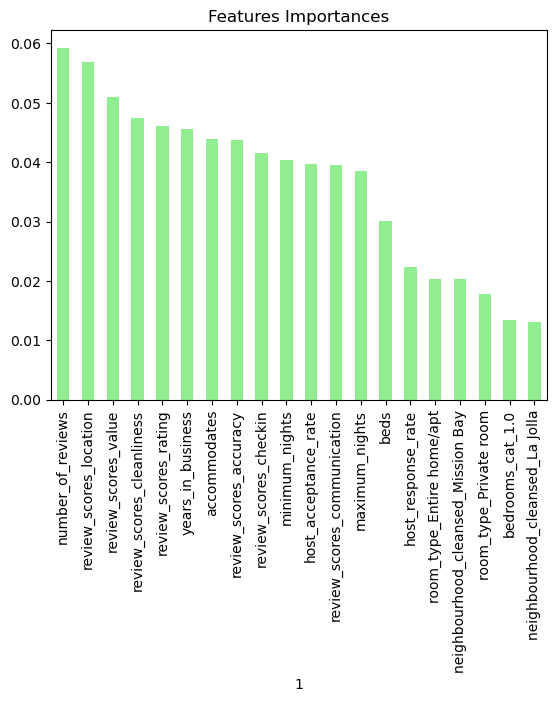

In [55]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

importances_df
importances_df[:20].plot(kind='bar', color='lightgreen', title= 'Features Importances', legend=False)

# Tuning random forest model using hyperparameters

In [ ]:
#defining the parameter grid
param_grid = {"bootstrap": [True],
"random_state":[78],
"max_depth": [20,50],
"max_features": ["auto", "sqrt"],
"min_samples_leaf": [1, 4],
"min_samples_split": [1, 2],
"n_estimators": [500]
}

In [ ]:
#creating base model
rf_model = RandomForestClassifier() 

In [ ]:
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_prediction=grid_search.predict(X_test)

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, grid_prediction)
cm_df = pd.DataFrame(
    cm, index=["a:<25th", "a:25th-50th", "a:>75th"], columns=["p:<25th", "p:25th-50th", "p:>75th"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, grid_prediction)
acc_score


Hyperparameter didn't improve the random forest model

# Support Vector Classifier

In [56]:
# Support vector machine linear classifier
SVC_model = SVC(kernel='linear')
SVC_model.fit(X_train, y_train)
SVC_prediction=SVC_model.predict(X_test)

In [57]:
# Model Accuracy
print('Test Accuracy: %.3f' % SVC_model.score(X_test, y_test))

Test Accuracy: 0.660


In [58]:
print(classification_report(y_test, SVC_prediction))

              precision    recall  f1-score   support

   25th-50th       0.66      0.84      0.74      1179
       <25th       0.68      0.51      0.59       450
       >75th       0.60      0.30      0.40       427

    accuracy                           0.66      2056
   macro avg       0.65      0.55      0.58      2056
weighted avg       0.65      0.66      0.64      2056

